# Library

In [29]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
import numpy as np

# Visualization
from matplotlib import pyplot as plt
%matplotlib inline
from seaborn import pairplot
from seaborn import heatmap
from seaborn import boxplot

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# 1. Data Understanding

## 1.1. Data Loading

In [30]:
dataset_path = "./updated_pollution_dataset.csv"
air_df = read_csv(dataset_path)
air_df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

## 1.2. Exploratory Data Analysis (EDA)

Buat dataframe baru untuk analisis

In [31]:
df = air_df.copy()
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

### Menampilkan Informasi Umum

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


### Menampilkan Ringkasan Statistik

In [33]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

### Memeriksa Missing Value

In [34]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Tidak ditemukan missing value pada semua fitur

### Diagram Pairplot untuk Melihat Korelasi Antar Fitur

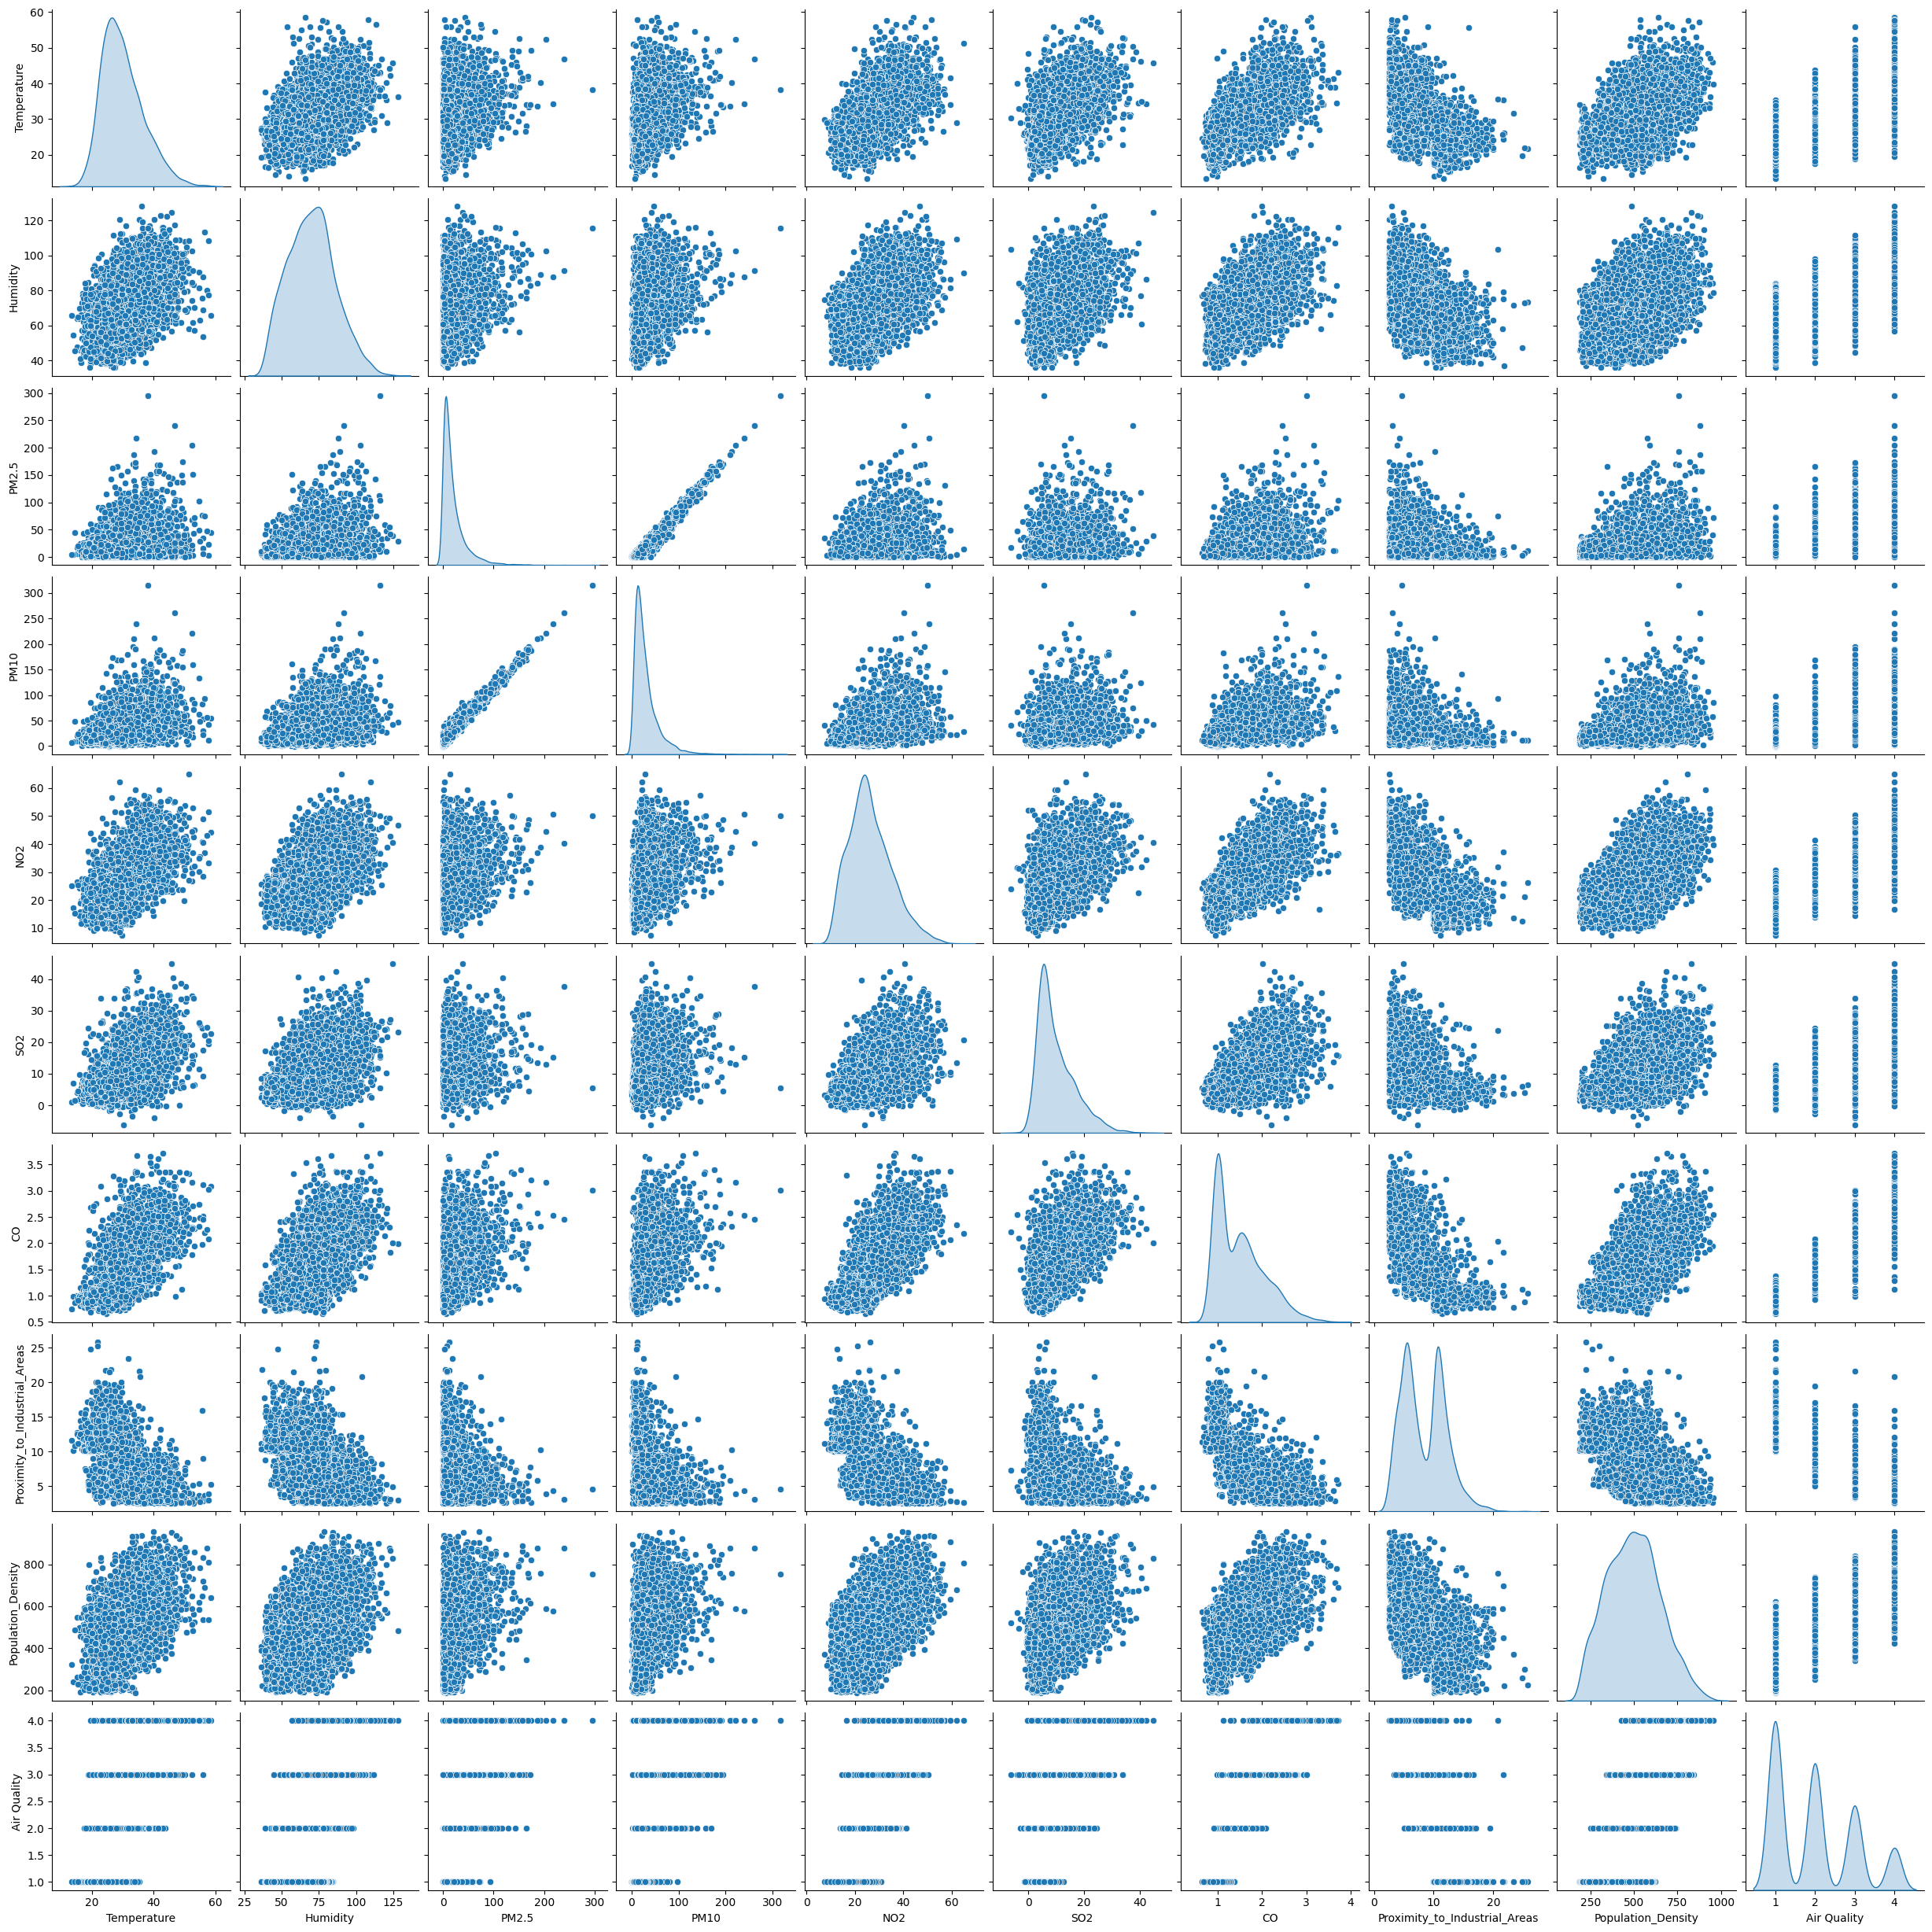

In [37]:
pairplot(df, diag_kind='kde')

Berdasarkan diagram di atas dapat dilihat semua fitur kecuali Proximity_to_Industrial_Areas memiliki korelasi positif dengan Air Quality. Sementara Proximity_to_Industrial_Areas memiliki korelasi negatif dengan Air Quality.

### Diagram Heatmap untuk Melihat Korelasi Antar Fitur

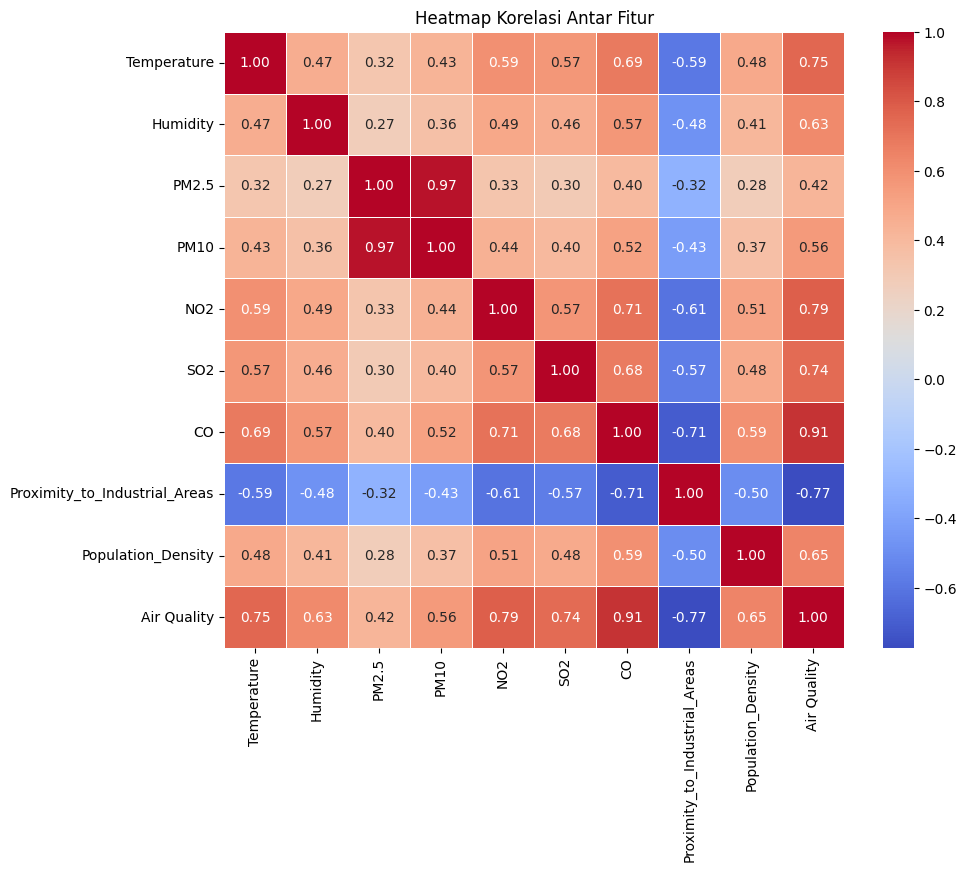

In [38]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Semua fitur memiliki nilai korelasi yang tinggi dengan fitur air quality dengan rentang 0.42 hingga 0.91. Fitur dengan korelasi tertinggi dengan air quality dimiliki oleh CO dan korelasi terendah dimiliki oleh PM2.5

### Memeriksa Outliers

<Axes: xlabel='Population_Density'>

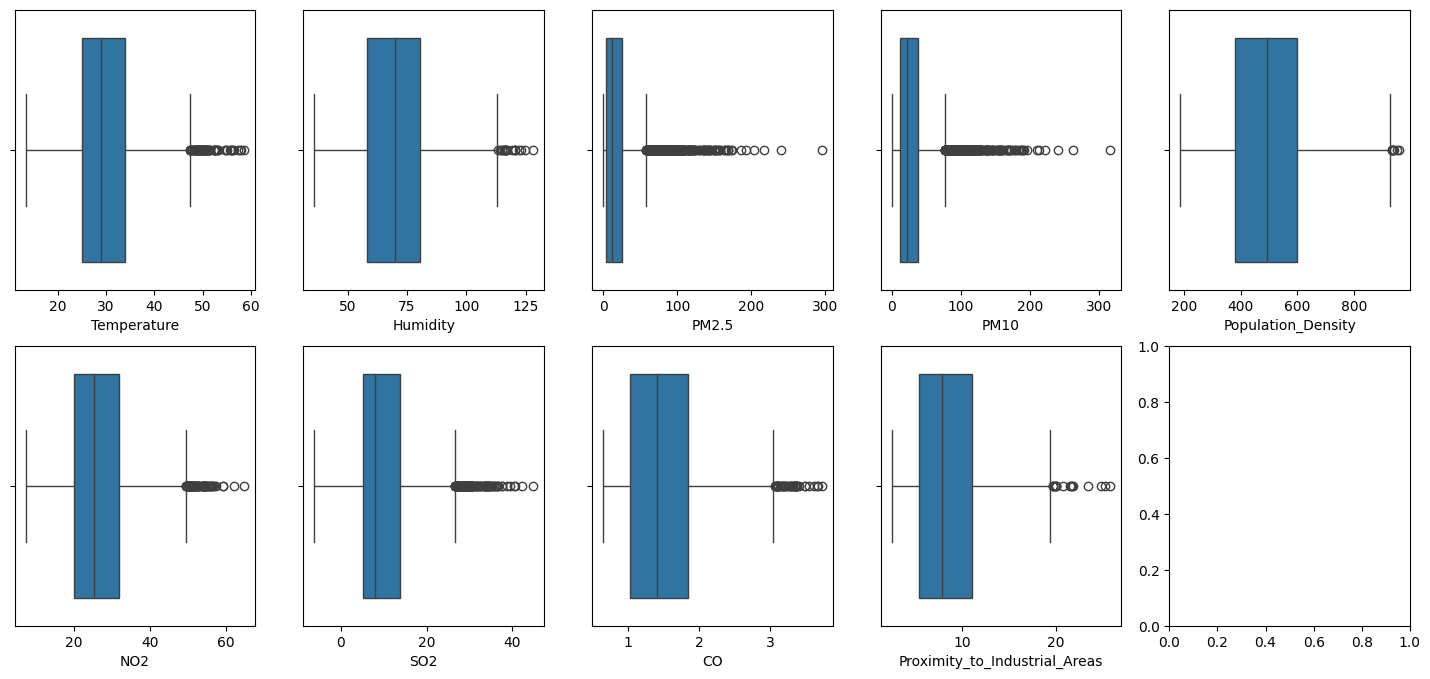

In [40]:
features = ["Temperature", "Humidity", "PM2.5", "PM10", "NO2","SO2", "CO", "Proximity_to_Industrial_Areas", "Population_Density"]
target = ["Air Quality"]

fig, axs = plt.subplots(2, 5)
fig.set_figwidth(18)
fig.set_figheight(8)
boxplot(x=df[features[0]], ax=axs[0, 0])
boxplot(x=df[features[1]], ax=axs[0, 1])
boxplot(x=df[features[2]], ax=axs[0, 2])
boxplot(x=df[features[3]], ax=axs[0, 3])
boxplot(x=df[features[4]], ax=axs[1, 0])
boxplot(x=df[features[5]], ax=axs[1, 1])
boxplot(x=df[features[6]], ax=axs[1, 2])
boxplot(x=df[features[7]], ax=axs[1, 3])
boxplot(x=df[features[8]], ax=axs[0, 4])

Berdasarkan diagram boxplot di atas diketahui bahwa semua fitur memiliki outliers. IQR method akan digunakan untuk mengatasi outliers ini. Berikut implemntasinya:

In [41]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[features]<(Q1-1.5*IQR))|(df[features]>(Q3+1.5*IQR))).any(axis=1)]

<Axes: xlabel='Population_Density'>

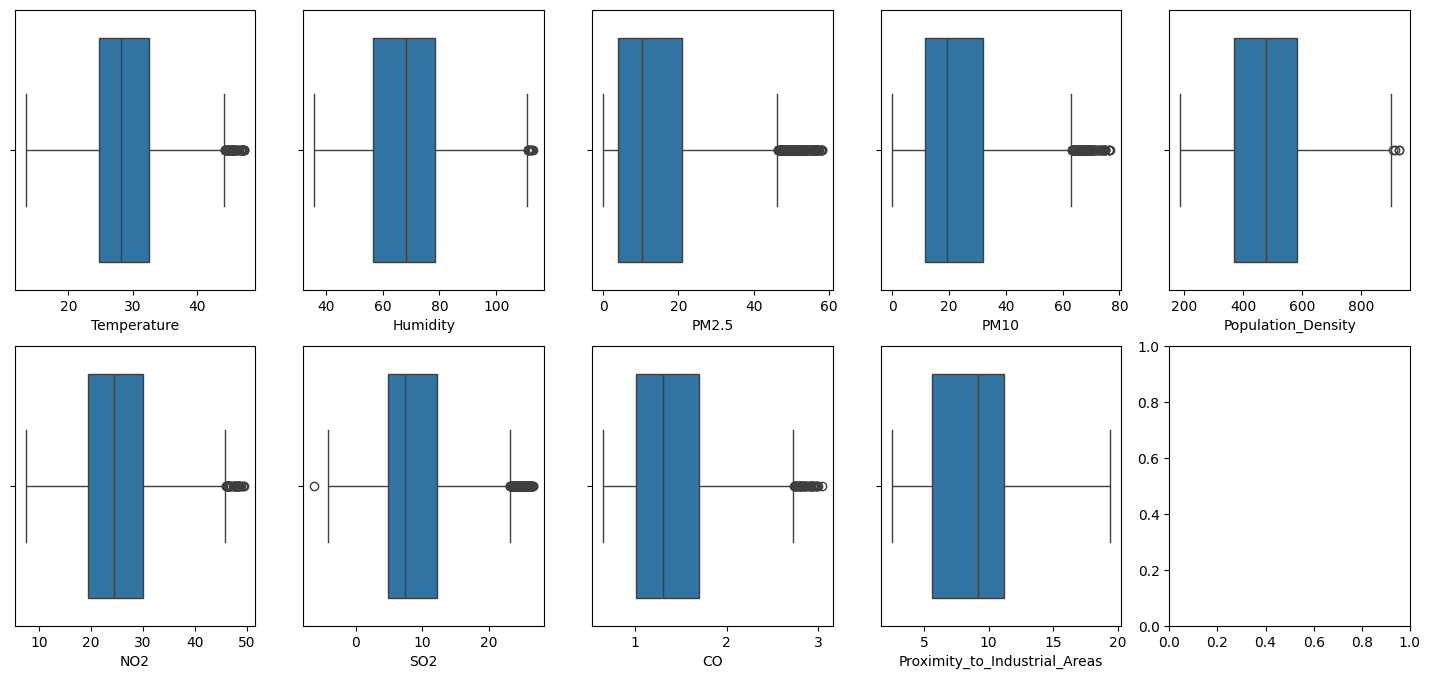

In [43]:
# Plotting Data After Outliers Cleaning
fig, axs = plt.subplots(2, 5)
fig.set_figwidth(18)
fig.set_figheight(8)
boxplot(x=df[features[0]], ax=axs[0, 0])
boxplot(x=df[features[1]], ax=axs[0, 1])
boxplot(x=df[features[2]], ax=axs[0, 2])
boxplot(x=df[features[3]], ax=axs[0, 3])
boxplot(x=df[features[4]], ax=axs[1, 0])
boxplot(x=df[features[5]], ax=axs[1, 1])
boxplot(x=df[features[6]], ax=axs[1, 2])
boxplot(x=df[features[7]], ax=axs[1, 3])
boxplot(x=df[features[8]], ax=axs[0, 4])

Dapat dilihat sekarang semua fitur sudah bersih dari outliers. Dan tentu dimensi dari dataset akan berkurang bersamaan dengan dibersihkannya outliers.

In [146]:
# Melihat dimensi dari dataset setelah pembersihan outliers
print("Dimensi data setelah outliers dibersihkan :", df.shape)

Dimensi data setelah outliers dibersihkan : (4407, 10)


# 2. Data Preparation

## 2.1. Label Encoding

Mengganti label kategorikal ke tipe numerik dengan aturan sebagai berikut:
1. Good      => 1
2. Moderate  => 2
3. Poor      => 3
4. Hazardous => 4

In [65]:
df.loc[:, ("Air Quality")] = df.loc[:, ("Air Quality")].replace({'Good': 1, 'Moderate': 2, 'Poor': 3, 'Hazardous': 4})
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                            6.3                 319            2  
1                            6.0                 611            2  
2                            5.2                 619            2  
3                           11.1                 551            1  
4                           12.7                 303            1

## 2.2. Seleksi Fitur

Semua fitur akan digunakan dikarenakan semua fitur memiliki korelasi yang baik dengan fitur target (air quality).
Fitur : suhu, kelembaban, konsentrasi PM2.5, konsentrasi PM10, konsentrasi NO2, konsentrasi SO2, konsentrasi CO, jarak dan kepadatan penduduk
Label : Air Quality

In [67]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

## 2.3. Splitting Dataset

Dataset akan dibagi menjadi data latih dan data uji dengan perbandingan 80:20. Dimana 80% untuk data latih dan 20% untuk data uji.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
print("Jumlah Data Latih :", X_train.shape[0])
print("Jumlah Data Uji   :", X_test.shape[0])

Jumlah Data Latih : 3525
Jumlah Data Uji   : 882


## 2.4. Standarisasi

Standarisasi dilakukan untuk menyamakan rentang nilai semua fitur agar meningkatkan performa pelatihan model.

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

DataFrame(X_train, columns=features).head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.491960 -0.000322 -0.506847 -0.310815  1.016380  0.416742  0.569109   
1    -1.588716  0.450406 -1.004188 -1.186215 -1.572768 -0.651426 -1.029231   
2    -0.991801  0.390751 -0.785659 -1.026470 -0.778079 -1.238919 -0.666941   
3    -0.855363 -1.717062 -0.348602 -0.566406  0.106333 -0.918468 -1.071853   
4    -0.770090  0.324467 -0.506847 -0.719761 -0.444822 -0.811651 -1.007920   

   Proximity_to_Industrial_Areas  Population_Density  
0                      -0.879905           -0.031636  
1                       0.556024            0.321992  
2                       0.383713           -1.432283  
3                       0.527306           -1.182663  
4                       0.412431           -1.099456

# 3. Modelling

Menyiapkan variabel model_acc yang akan menampung setiap metrik evaluasi model untuk kemudian dibandingkan.

In [70]:
models_acc = DataFrame(index=['accuracy', 'precision', 'recall', 'f1-score'], columns=['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN'])
models_acc.head()

Logistic Regression Random Forest Gradient Boosting  SVM  KNN
accuracy                  NaN           NaN               NaN  NaN  NaN
precision                 NaN           NaN               NaN  NaN  NaN
recall                    NaN           NaN               NaN  NaN  NaN
f1-score                  NaN           NaN               NaN  NaN  NaN

## 3.1. Logistic Regression

In [124]:
logReg = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', random_state=42)
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
print(classification_report(y_test, y_pred))

logReg_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "Logistic Regression"] = logReg_report["accuracy"]
models_acc.loc["precision", "Logistic Regression"] = logReg_report["macro avg"]["precision"]
models_acc.loc["recall", "Logistic Regression"] = logReg_report["macro avg"]["recall"]
models_acc.loc["f1-score", "Logistic Regression"] = logReg_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       419
           2       0.93      0.97      0.95       275
           3       0.83      0.87      0.85       150
           4       1.00      0.37      0.54        38

    accuracy                           0.94       882
   macro avg       0.94      0.80      0.83       882
weighted avg       0.94      0.94      0.94       882



## 3.2. Random Forest

In [83]:
RF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_leaf=2, random_state=42)
RF.fit(X_train, y_train)


y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))

RF_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "Random Forest"] = RF_report["accuracy"]
models_acc.loc["precision", "Random Forest"] = RF_report["macro avg"]["precision"]
models_acc.loc["recall", "Random Forest"] = RF_report["macro avg"]["recall"]
models_acc.loc["f1-score", "Random Forest"] = RF_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       419
           2       0.98      0.85      0.91       275
           3       0.73      0.89      0.80       150
           4       0.68      0.74      0.71        38

    accuracy                           0.92       882
   macro avg       0.85      0.87      0.85       882
weighted avg       0.93      0.92      0.92       882



## 3.3. Gradient Boosting

In [75]:
GB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', random_state=42)
GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)
print(classification_report(y_test, y_pred))

GB_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "Gradient Boosting"] = GB_report["accuracy"]
models_acc.loc["precision", "Gradient Boosting"] = GB_report["macro avg"]["precision"]
models_acc.loc["recall", "Gradient Boosting"] = GB_report["macro avg"]["recall"]
models_acc.loc["f1-score", "Gradient Boosting"] = GB_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       419
           2       0.97      0.86      0.91       275
           3       0.75      0.88      0.81       150
           4       0.66      0.76      0.71        38

    accuracy                           0.92       882
   macro avg       0.84      0.87      0.86       882
weighted avg       0.93      0.92      0.93       882



## 3.4. Support Vector Machine

In [141]:
svm = SVC(C=1.0, kernel='linear', gamma=1.0, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

svm_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "SVM"] = svm_report["accuracy"]
models_acc.loc["precision", "SVM"] = svm_report["macro avg"]["precision"]
models_acc.loc["recall", "SVM"] = svm_report["macro avg"]["recall"]
models_acc.loc["f1-score", "SVM"] = svm_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       419
           2       0.97      0.97      0.97       275
           3       0.77      0.95      0.85       150
           4       0.75      0.08      0.14        38

    accuracy                           0.94       882
   macro avg       0.87      0.75      0.74       882
weighted avg       0.94      0.94      0.93       882



## 3.5. K-Nearest Neighbors

In [81]:
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto', leaf_size=30, n_jobs=-1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

knn_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "KNN"] = knn_report["accuracy"]
models_acc.loc["precision", "KNN"] = knn_report["macro avg"]["precision"]
models_acc.loc["recall", "KNN"] = knn_report["macro avg"]["recall"]
models_acc.loc["f1-score", "KNN"] = knn_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       419
           2       0.92      0.97      0.95       275
           3       0.85      0.82      0.84       150
           4       0.80      0.53      0.63        38

    accuracy                           0.94       882
   macro avg       0.89      0.83      0.85       882
weighted avg       0.94      0.94      0.94       882



# 4. Evaluation

## 4.1. Performa dari Setiap Model

In [142]:
models_acc

Logistic Regression Random Forest Gradient Boosting       SVM  \
accuracy             0.942177      0.921769          0.922902  0.939909   
precision            0.937722      0.847019          0.843904  0.871521   
recall               0.803166      0.867695          0.874454  0.747937   
f1-score             0.833763      0.853859          0.856114  0.739486   

                KNN  
accuracy   0.939909  
precision  0.891562  
recall     0.829306  
f1-score   0.853133

Dapat dilihat model dengan algoritma logistic regression memiliki performa terbaik dibanding algoritma lain.

## 4.2. Optimisasi Logistic Regression

### 4.2.1. Definisi Ruang Hyperparameter

Mendefinisikan model dan ruang pencarian yang menampung parameter-parameter untuk pencarian model terbaik.

In [ ]:
LogReg_models = LogisticRegression(random_state=42)

search_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-5, 1e-6, 1e-7],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_search = GridSearchCV(
    estimator=LogReg_models,
    param_grid=search_space,
    verbose=4,
    cv=2
)

### 4.2.2. Training

Proses pelatihan model dengan paramater-parameter yang telah didefinisikan di ruang pencarian sebelumnya.

In [105]:
logRegs_models = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 10368 candidates, totalling 20736 fits
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.935 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.0s
[CV 2/

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.935 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.930 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.890 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.930 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.890 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.930 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.890 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.930 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.935 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbf

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.929 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.929 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.929 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.929 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.920 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.935 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.920 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.920 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.935 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.920 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.925 tota

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.906 total time=   0.5s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.928 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.906 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.928 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.906 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.928 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.906 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.928 total time=   0.4s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.925 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.921 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.940 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.921 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.921 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.940 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.921 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.940 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.935 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.935 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.925 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.935 tot

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.745 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.615 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.745 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.615 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.745 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.615 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.745 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.615 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.722 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.722 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.677 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.697 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.677 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.697 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.677 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.697 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.677 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.697 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.683 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.678 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.683 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.678 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.683 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.678 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.683 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.678 total time=   0.1s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.715 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.715 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.715 total time=   0.3s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.715 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.722 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.722 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.752 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.708 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.752 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.708 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.752 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.708 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.752 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.708 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.705 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.742 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.705 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.742 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.705 total time=   0.1s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.742 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.705 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.742 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.691 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.741 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.691 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.741 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.691 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.741 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.691 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.741 total time=   0.4s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.722 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.722 total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.733 total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.744 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.661 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.744 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.661 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.744 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.661 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.744 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.661 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.685 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.721 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.721 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.685 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.721 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.721 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.1, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.942 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.942 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.942 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.942 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.951 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.951 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.940 total time=   0.0s
[CV 2/

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.951 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.940 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.951 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.940 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.951 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.940 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.951 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001;, score=0.876 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-05;, score=0.891 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-05;, score=0.876 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-06;, score=0.891 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-06;, score=0.876 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-07;, score=0.891 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-07;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.953 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.942 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.953 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.942 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.953 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.951 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.951 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.951 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.951 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.951 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.953 total time=   0.3s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.951 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.951 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.940 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.951 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.804 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.804 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.799 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.804 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.799 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.803 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.803 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cholesky, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cholesky, tol=1e-06;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cholesky, tol=1e-07;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cholesky, tol=1e-07;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.804 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.799 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.803 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.803 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.933 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.942 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.933 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.942 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.933 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.942 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.933 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.942 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.9

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.892 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.892 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.892 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.892 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.892 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblin

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.898 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.909 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.898 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.909 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.898 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.909 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.898 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.931 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.940 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.931 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.940 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.940 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.931 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.940 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbf

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.929 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.928 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.928 total time=   0.3s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.929 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.928 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.929 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.928 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.936 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.917 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.936 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.917 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.936 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.917 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.936 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.934 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.934 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.934 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.934 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.935 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.935 total time=   0.4s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.937 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.933 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.925 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.925 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.925 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.925 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.914 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.926 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.914 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.926 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.914 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.926 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.914 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.926 total time=   0.3s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.707 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.741 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.707 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.741 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.707 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.741 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.707 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.728 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.667 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.773 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.667 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.773 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.667 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.773 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.667 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.699 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.626 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.699 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.626 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.699 total time=   0.1s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.626 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.699 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.626 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.709 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.734 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.709 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.734 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.709 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.734 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.709 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.734 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.671 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.767 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.671 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.767 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.671 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.767 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.671 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.758 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.661 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.758 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.661 total time=   0.2s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.758 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.661 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.758 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.661 total time=   0.1s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.713 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.760 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.713 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.760 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.713 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.760 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.713 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.760 total time=   0.3s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.728 total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.694 total time=   0.3s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.658 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.694 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.658 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.694 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.658 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.694 total time=   0.2s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.658 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.737 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.671 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.737 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.671 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.737 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.671 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.737 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.671 total time=   0.3s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.953 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.887 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.872 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.887 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.872 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.887 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.872

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.953 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.953 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.951 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.951 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.951 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.951 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.953 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.953 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=1e-06;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=1e-07;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=1e-07;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001;, score=

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.953 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.953 total time=   0.3s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.796 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.796 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.796 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.804 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.804 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.799 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.932 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.926 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.932 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.926 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.932 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.926 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.932 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.926 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.938 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.9

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.897 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.900 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.897 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.900 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.897 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.900 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lib

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.902 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.926 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.902 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.926 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.902 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.926 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.902 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.926 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.922 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.936 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.922 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.936 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.922 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.936 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.922 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.936 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.923 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.923 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.923 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.923 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.938 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.882 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.882 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.936 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.882 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.882 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.936 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.934 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.934 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.925 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.934 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.934 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.905 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.905 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.905 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.905 total time=   0.3s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.938 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.934 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.934 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.934 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.934 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.938 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.938 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.935 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.938 total time=   0.3s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.654 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.614 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.654 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.614 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.654 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.614 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.654 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.614 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.729 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.805 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.787 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, so

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.672 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.744 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.672 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.744 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.672 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.744 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.672 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.744 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.761 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.622 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.761 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.622 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.761 total time=   0.1s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.622 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.761 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.622 total time=   0.1s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.708 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.686 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.708 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.686 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.708 total time=   0.3s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.686 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.708 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.686 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.729 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.697 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.624 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.697 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.624 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.697 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.624 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.697 total time=   0.2s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.624 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.735 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.718 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.735 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.718 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.735 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.718 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.735 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.718 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.685 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.685 total time=   0.3s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.729 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.746 total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.732 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.674 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.732 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.674 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.732 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.674 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.732 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.674 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.671 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.704 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.671 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.671 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.671 total time=   0.2s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.951 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.952 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.888 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.874 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.888 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.874 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.888 tot

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.943 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.944 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.953 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.951 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.951 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.951 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.951 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.3s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.950 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.950 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.950 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.950 total time=   0.4s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.953 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.943 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.798 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.798 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.798 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.803 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.803 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.923 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.893 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.923 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.893 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.923 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.893 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.923 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.893 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.9

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.902 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.901 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.902 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.901 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.902 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.901 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newt

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.922 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.889 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.922 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.889 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.922 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.889 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.922 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.936 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.917 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.936 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.917 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.936 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.917 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.936 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.917 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbf

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-07;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.942 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.942 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.929 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.942 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.929 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.942 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.942 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.856 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.942 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.856 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.942 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.856 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.942 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.928 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.939 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.928 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.939 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.928 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.939 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.928 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.939 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.928 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.931 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.928 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.928 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.928 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.910 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.924 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.910 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.924 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.910 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.924 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.910 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.924 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.920 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.938 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.920 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.938 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.920 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.938 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.938 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.696 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.621 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.696 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.621 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.696 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.621 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.696 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.621 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, so

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.685 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.700 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.685 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.700 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.685 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.700 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.685 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.700 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.782 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.703 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.782 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.703 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.782 total time=   0.1s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.703 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.782 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.703 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.774 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.754 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.774 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.754 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.774 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.754 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.774 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.754 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.669 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.608 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.669 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.608 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.669 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.608 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.669 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.608 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.718 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.663 total time=   0.1s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.718 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.663 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.718 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.663 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.718 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.663 total time=   0.2s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.741 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.715 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.741 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.715 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.741 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.715 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.741 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.715 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.724 total time=   0.2s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.652 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.724 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.652 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.724 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.652 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.724 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.652 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.689 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.754 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.689 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.754 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.689 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.754 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.689 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.754 total time=   0.3s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=1.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.951 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.951 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.951 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.951 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.891 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.875 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.891 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.875 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.891 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.875

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.944 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.944 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.944 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.944 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.944 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.800 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.803 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.808 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.798 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.808 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.798 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.799 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.799 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-07;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-07;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=100, penalt

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001;, score=0.808 total time=  

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.933 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.930 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.933 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.930 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.933 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.930 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.933 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.933 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.933 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.933 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.905 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.903 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.905 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.893 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.907 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.893 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.907 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.893 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.907 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.927 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.923 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.927 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.923 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.927 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.923 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.927 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.923 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001;, score=0.910 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001;, score=0.906 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-05;, score=0.911 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-05;, score=0.907 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-06;, score=0.911 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=1e-06;, score=0.907 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=li

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.923 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.923 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.923 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.923 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.938 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.933 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.933 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.914 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.878 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.914 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.878 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.914 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.878 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.914 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.902 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.935 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.902 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.935 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.902 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.935 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.902 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.935 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.922 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.926 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.922 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.926 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.922 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.926 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.922 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.926 total time=   0.3s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.933 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.940 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.933 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.930 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.930 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.930 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.930 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.918 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.918 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.925 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.925 total time=   0.3s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.728 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.644 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.728 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.644 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.728 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.644 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.728 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.644 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.731 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.805 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.787 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.805 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.787 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.805 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.787 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solv

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.648 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.703 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.648 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.703 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.648 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.703 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.648 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.703 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.706 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.625 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.706 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.625 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.706 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.625 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.706 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.625 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.704 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.767 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.704 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.767 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.704 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.767 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.704 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.767 total time=   0.2s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.731 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.655 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.734 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.655 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.734 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.655 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.734 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.655 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.734 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.727 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.670 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.727 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.670 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.727 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.670 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.727 total time=   0.1s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.670 total time=   0.1s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.699 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.731 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.699 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.731 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.699 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.731 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.699 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.731 total time=   0.4s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.731 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.732 total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.682 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.740 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.682 total time=   0.2s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.740 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.682 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.740 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.682 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.740 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.740 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.691 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.740 total time=   0.3s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.691 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.740 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.691 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.740 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.691 total time=   0.3s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.892 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.877 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.892 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.877 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.892 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.877

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/s

[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.944 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.800 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.802 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.799 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.802 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.799 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001;, score=0.805 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001;, score=0.800 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=1e-05;, score=0.806 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=1e-06;, score=0.806 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=1e-06;, score=0.800 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=1e-07;, 

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.803 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.799 total time=   0.0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.921 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.925 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.921 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.921 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.925 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.921 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.925 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.939 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.934 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.939 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.906 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.904 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.906 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.904 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.906 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblin

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.931 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.934 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.934 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.934 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.931 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.934 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.923 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.939 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.923 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.939 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.923 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.939 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.923 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.939 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.923 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.927 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.923 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.927 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.923 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.927 total time=   0.3s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.923 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.9

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.913 total time=   0.2s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.940 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.913 total time=   0.2s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.940 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.913 total time=   0.2s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.940 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.913 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.940 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.922 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.939 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.922 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.939 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.922 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.939 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.922 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.939 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.905 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.940 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.905 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.905 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.940 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.905 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.940 total time=   0.3s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.900 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.934 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.900 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.934 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.900 total time=   0.3s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.934 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.900 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.934 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.927 total time=   0.3s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.927 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.940 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.927 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.940 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.724 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.739 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.724 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.739 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.724 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.739 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.724 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.731 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.730 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.730 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.805 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.787 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.805 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=libline

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.685 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.710 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.685 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.710 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.685 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.710 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.731 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.730 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.731 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.730 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.731 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.730 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.731 total time=   0.1s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.730 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.710 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.741 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.710 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.741 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.710 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.741 total time=   0.3s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.710 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.731 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.686 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.666 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.686 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.666 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.686 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.666 total time=   0.2s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.686 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.716 total time=   0.2s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.670 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.716 total time=   0.2s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.670 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.716 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.670 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.716 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.670 total time=   0.1s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.697 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.720 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.697 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.720 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.697 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.720 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.697 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.720 total time=   0.4s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.731 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.706 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.653 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.706 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.653 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.706 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.653 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.706 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.653 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.721 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.709 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.721 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.709 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.721 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.709 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.721 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.709 total time=   0.2s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=2.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.892 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.879 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.892 total time=

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.892 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.879 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.892 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.879 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.953 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.953 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan to

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.800 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.799 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.802 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.799 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.799 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.799 total time=   0.0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.943 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.930 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.930 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.943 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.930 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.934 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.934 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.934 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.939 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.906 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.904 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.906 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.904 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.940 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-06;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=ne

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.912 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.917 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.912 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.917 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.912 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.917 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.912 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.929 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.935 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.929 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.935 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.929 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.935 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.929 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.935 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.920 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.926 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.926 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.920 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.926 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.926 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.922 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.922 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.922 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.922 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.936 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.919 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.943 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.919 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.919 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.943 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.919 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.910 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.910 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.910 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.910 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.915 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.915 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.915 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.935 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.915 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.935 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.908 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.922 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.908 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.922 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.908 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.922 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.908 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.922 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.678 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.682 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.678 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.682 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.678 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.682 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.678 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.682 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.805 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.787 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.805 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.787 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.805 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.678 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.680 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.678 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.680 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.678 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.680 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.678 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.680 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.740 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.623 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.740 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.623 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.740 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.623 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.740 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.623 total time=   0.1s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.729 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.742 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.742 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.742 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.742 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.700 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.662 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.700 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.662 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.700 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.662 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.700 total time=   0.1s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.662 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.689 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.702 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.689 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.702 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.689 total time=   0.2s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.702 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.689 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.702 total time=   0.2s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.698 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.728 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.698 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.728 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.698 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.728 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.698 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.728 total time=   0.4s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.653 total time=   0.3s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.654 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.653 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.654 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.653 total time=   0.3s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.654 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.653 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.654 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.768 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.704 total time=   0.3s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.768 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.704 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.768 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.768 total time=   0.3s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.953 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.953 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.893 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.880 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.893 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.880 total t

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.893 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.880 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.893 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.880 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.953 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.953 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.953 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.2s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.944 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.2s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.953 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.803 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.802 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.802 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.923 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.933 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.923 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.933 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.923 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.933 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.923 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.935 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.906 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.903 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.906 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.906 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.903 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.936 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=ne

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.903 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.914 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.903 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.914 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.903 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.914 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.903 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.914 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.937 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.937 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.937 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.931 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.937 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbf

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.923 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.942 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.923 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.942 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.923 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.942 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.923 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.942 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.934 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.921 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.934 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.921 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.934 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.921 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.934 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.928 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.928 total time=   0.2s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.928 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.928 total time=   0.2s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.938 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.932 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.931 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.932 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.931 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.932 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.931 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.932 total time=   0.4s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.897 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.897 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.897 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.931 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.897 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.931 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.934 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.934 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.934 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.934 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.934 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.934 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.934 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.934 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.676 total time=   0.2s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.623 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.676 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.623 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.676 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.623 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.676 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.623 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.787 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.805 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.787 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, so

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.698 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.659 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.698 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.659 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.698 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.659 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.698 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.736 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.709 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.736 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.709 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.736 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.709 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.736 total time=   0.1s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.709 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-06;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-07;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-07;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=F

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.669 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.673 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.669 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.673 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.669 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.673 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.669 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.673 total time=   0.2s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.716 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.678 total time=   0.2s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.716 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.678 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.716 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.678 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.716 total time=   0.1s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.735 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.741 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.735 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.741 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.735 total time=   0.3s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.741 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.735 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.741 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.733 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.671 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.733 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.671 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.733 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.671 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.733 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.671 total time=   0.4s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.745 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.744 total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.704 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.698 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.698 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.704 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.698 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.704 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.698 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.759 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.759 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.759 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.685 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.759 total time=   0.3s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=3.5, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.894 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.880 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.894 total time=

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.946 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=sag, tol=1e-07;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=1e-06;,

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.946 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.944 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.952 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.944 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.952 total time=   0.4s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.952 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.946 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.952 total time=   0.1s
[CV 1

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.952 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.946 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.946 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.946 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.952 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.946 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.952 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.803 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.803 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.803 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.802 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.1s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.800 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.802 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.800 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.802 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.800 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.800 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.802 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.799 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.802 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.800 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.802 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=None, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.800 total time=   0.0

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.931 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.915 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.915 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.931 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sc

[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.915 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.939 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.935 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.939 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.906 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.903 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=1e-

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.933 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.915 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.933 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.915 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.933 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.915 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.933 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.922 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.943 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.922 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.943 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.922 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.943 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.922 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.943 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=100, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.930 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.930 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.930 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.938 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.930 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.938 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-07;, score=0.939 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001;, score=0.906 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001;, score=0.903 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=1e-05;, score=0.906 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=1e-05;, score=0.903 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=1e-06;, score=0.906 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=liblin

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.900 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.918 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.900 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.918 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.900 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.918 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.900 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.933 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.933 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.933 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.938 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.933 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.938 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=200, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.920 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.920 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.927 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.920 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.927 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.920 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.935 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.939 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.935 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.939 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.935 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.927 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.927 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.920 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.927 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.925 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.925 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.925 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.940 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.925 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.940 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=True, max_iter=300, penalty=elasticn

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.686 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.612 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.686 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.612 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.686 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-06;, score=0.612 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.686 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=1e-07;, score=0.612 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-06;, sc

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.788 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.804 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.788 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.804 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-06;, score=0.788 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=1e-07;, score=0.804 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.661 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.704 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.661 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.704 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-06;, score=0.661 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.704 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=sag, tol=1e-07;, score=0.661 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.760 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.682 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.760 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.682 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.760 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-06;, score=0.682 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.760 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=1e-07;, score=0.682 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=100, penalty=elasticnet, sol

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.744 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.744 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-05;, score=0.696 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.744 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-06;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.744 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=1e-07;, score=0.696 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.744 total time=   0.1s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.729 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=0.0001;, score=0.623 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.729 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-05;, score=0.623 total time=   0.1s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.729 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-06;, score=0.623 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.729 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=sag, tol=1e-07;, score=0.623 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.724 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001;, score=0.738 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.724 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-05;, score=0.738 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.724 total time=   0.2s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-06;, score=0.738 total time=   0.1s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.724 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=1e-07;, score=0.738 total time=   0.2s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=200, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.736 total time=   0.5s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=0.0001;, score=0.710 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.736 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-05;, score=0.710 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.736 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-06;, score=0.710 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.736 total time=   0.4s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l1, solver=saga, tol=1e-07;, score=0.710 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.730 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.730 total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, score=0.744 total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-06;, s

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.699 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=0.0001;, score=0.729 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.699 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-05;, score=0.729 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.699 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-06;, score=0.729 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.699 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=sag, tol=1e-07;, score=0.729 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.708 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=0.0001;, score=0.696 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.708 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-05;, score=0.696 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.708 total time=   0.2s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-06;, score=0.696 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.708 total time=   0.3s


/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
13824 fits failed out of a total of 20736.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/base.py", line 1473, i

[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=l2, solver=saga, tol=1e-07;, score=0.696 total time=   0.3s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=elasticnet, solver=lbfgs, tol=1e-06;, score=nan total time=   0.0s
[CV 2/2] END C=4.0, class_weight=balanced, fit_intercept=False, max_iter=300, penalty=e

/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
/home/yelf/.pyenv/tf2.16/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 4.2.3. Best Model

Mencetak parameter terbaik dari hasil pencarian sebelumnya.

In [151]:
best_model = logRegs_models.best_estimator_
best_param = logRegs_models.best_params_
print("Parameter Terbaik : ", best_param)

Parameter Terbaik :  {'C': 3.0, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}


## 4.3. Performa Model Logistic Regression Terbaik

Mencetak akurasi dari model logistic regression dengan parameter terbaik hasil pencarian sebelumnya

In [107]:
logReg_model = best_model
y_pred = logReg_model.predict(X_test)

print("Aktual   :", np.array(y_test)[:10])
print("Prediksi :", y_pred[:10])

# akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAkurasi model Logistic Regression : {accuracy:.2f}%")

print("\n", classification_report(y_test, y_pred))

Aktual   : [1 2 3 2 2 1 3 1 1 2]
Prediksi : [1 2 3 2 2 1 3 1 1 2]

Akurasi model Logistic Regression : 95.12%

               precision    recall  f1-score   support

           1       0.99      1.00      1.00       419
           2       0.96      0.96      0.96       275
           3       0.88      0.86      0.87       150
           4       0.74      0.74      0.74        38

    accuracy                           0.95       882
   macro avg       0.89      0.89      0.89       882
weighted avg       0.95      0.95      0.95       882



Membuat Dataframe untuk membandingkan performa model logistic regression sebelum dan sesudah dilakukan optimisasi

In [145]:
model_tune = DataFrame(index=['accuracy', 'precision', 'recall', 'f1-score'], columns=['Before Optimization', 'After Optimization'])

logReg_report = classification_report(y_test, y_pred, output_dict=True)
model_tune.loc["accuracy", "Before Optimization"] = logReg_report["accuracy"]
model_tune.loc["precision", "Before Optimization"] = logReg_report["macro avg"]["precision"]
model_tune.loc["recall", "Before Optimization"] = logReg_report["macro avg"]["recall"]
model_tune.loc["f1-score", "Before Optimization"] = logReg_report["macro avg"]["f1-score"]

logReg_report_tuned = classification_report(y_test, y_pred, output_dict=True)
model_tune.loc["accuracy", "After Optimization"] = logReg_report_tuned["accuracy"]
model_tune.loc["precision", "After Optimization"] = logReg_report_tuned["macro avg"]["precision"]
model_tune.loc["recall", "After Optimization"] = logReg_report_tuned["macro avg"]["recall"]
model_tune.loc["f1-score", "After Optimization"] = logReg_report_tuned["macro avg"]["f1-score"]

In [127]:
model_tune.head()

Before Optimization After Optimization
accuracy             0.942177           0.951247
precision            0.937722           0.890947
recall               0.803166           0.888614
f1-score             0.833763           0.889756

Terjadi peningkatan akurasi lebih kurang 1% untuk setiap metrik evaluasi.